<a href="https://colab.research.google.com/github/zerotodeeplearning/covid-19-dataviz/blob/master/Covid_19_data_exploration_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Covid-19 data exploration with Pandas

Let's clone the 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

In [ ]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

## Data loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
df = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
df.head()

In [ ]:
df.shape

Let's do a little bit of data munging:
- drop `Lat` and `Long`
- aggregate by `Country/Region`
- transpose
- set the date as index

In [ ]:
dfcountries = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum().transpose()

dfcountries.index = pd.to_datetime(dfcountries.index)

dfcountries.head()

## Selections and aggregations

In [ ]:
dfcountries['Italy']

In [ ]:
dfcountries['Italy'].plot();

Let's make it a little prettier

In [ ]:
series = dfcountries['Italy']
series[series > 100].plot(style='o-', logy=True, title='Italy')
plt.ylabel('Confirmed Cases');

### Exercise 1: Python functions

- Encapsulate the code above into a function with the signature:

  ```python
  def plot_country(country, min_cases=100, logy=True):
    ...
    ...
  ```
  that plots the data for an arbitrary country.
- Use the function to plot a few countries
- Bonus points if you add a legend

```
# This is formatted as code
```



In [ ]:
## your code here


## Number of cases

In [ ]:
total_cases = dfcountries.tail(1).transpose()
total_cases

In [ ]:
last_date = total_cases.columns[0]
print_date = last_date.strftime("%B %d, %Y")
print_date

In [ ]:
top_countries = total_cases[last_date].sort_values(ascending=False).head(20)
top_countries

### Exercise 2: Pandas bar plot

- Use the `.plot()` method from Pandas to display the number of cases in the top 20 countries with a horizontal bar chart.
- Bonus points if you add a title
- Bonus point if you sort the bars in decreasing order from top to bottom


In [ ]:
## your code here


## New cases

### Exercise 3: New cases

- Pick a country of your choice and define a variable called `country`
- Select the corresponding column in `dfcountries`
- Use the `.diff()` method to define a Pandas Series that contains the new daily cases. Call it `ts`.
- Filter out the rows with 0 new cases

In [ ]:
## your code here


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(ts.index, ts.values)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title(f'{country}: New cases')
ax.set_ylabel('Count')
ax.set_xlabel('Date');

## Comparison top 10

In [ ]:
dftopcountries = dfcountries[top_countries.index[:10]]
dftopcountries.head()

In [ ]:
min_cases = 500

In [ ]:
df_realigned = dftopcountries[dftopcountries > min_cases].dropna(how='all').reset_index(drop=True)
df_realigned

### Exercise 4
Iterate over the columns in `df_realigned` and shift the values up eliminating the null values in such a way that each country's time-series starts at the first row. This is not easy and there are multiple ways to solve this exercise.

The goal is to obtain a DataFrame that looks like this:

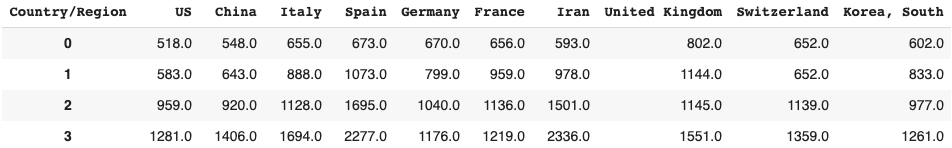

In [ ]:
## your code here


In [ ]:
x = np.arange(20)
y = 1.35**(x+21)

df_realigned.plot(logy=True, figsize=(15, 10), style='o-', title="Number of cases")
plt.xlabel("Days since 500 cases")
plt.plot(x, y, c='black', linewidth=5)
plt.text(12, 1e5, "1.35x daily growth", fontsize=15);

### Exercise 5: What can you do to help minimize the impact of COVID-19?

In [ ]:
## your code here